**Cancer Patient Detection from Abundent Protien of Human Sera using Machine Learning Algorithm**

In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Power Transformation
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

# Feature Selection
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Model Evalution
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Load dataset

In [ ]:
df = pd.read_csv('phpt8tg99.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V9962,V9963,V9964,V9965,V9966,V9967,V9968,V9969,V9970,V9971,V9972,V9973,V9974,V9975,V9976,V9977,V9978,V9979,V9980,V9981,V9982,V9983,V9984,V9985,V9986,V9987,V9988,V9989,V9990,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,71,0,95,0,538,404,20,0,0,0,0,17,0,239,0,0,0,0,0,0,0,30,0,89,262,0,147,389,0,0,103,19,9,2,0,0,0,0,0,...,291,0,0,19,0,162,54,23,0,0,0,378,0,0,0,0,0,52,0,294,168,0,0,0,222,0,0,0,0,255,570,86,0,36,0,80,0,0,524,1
1,0,41,82,165,60,554,379,0,71,0,0,0,0,34,364,0,0,0,1,7,0,0,0,0,110,263,0,180,564,0,0,139,0,45,0,0,0,0,11,0,...,267,0,69,0,32,19,96,4,35,0,0,411,0,0,0,0,0,105,19,320,213,0,0,66,243,0,63,63,30,213,605,69,7,473,0,57,0,284,423,2
2,0,0,1,40,0,451,402,0,0,0,0,0,15,0,269,0,0,0,0,0,0,0,14,0,121,278,0,198,494,0,0,103,3,8,0,0,0,0,0,0,...,313,0,0,1,5,0,23,0,0,0,0,409,0,0,0,0,0,68,0,342,157,0,0,13,245,0,14,1,0,235,593,28,0,24,0,90,0,34,508,1
3,0,56,44,275,14,511,470,0,0,0,0,0,0,69,270,0,0,0,55,0,0,0,34,0,221,259,0,134,435,0,0,66,28,0,30,0,0,0,13,0,...,230,0,0,0,24,54,12,0,0,0,0,357,0,0,0,0,0,58,0,346,146,0,0,0,237,0,26,26,18,91,600,0,26,86,0,102,0,0,469,1
4,105,0,141,348,0,268,329,0,0,1,0,0,23,0,312,17,0,0,322,0,0,0,0,2,265,128,0,86,428,60,0,200,0,34,0,0,0,4,0,0,...,117,0,96,67,0,0,83,0,0,14,0,256,0,79,93,0,0,29,0,71,126,0,0,240,134,140,1,0,0,813,0,0,0,0,190,301,0,0,354,2


In [ ]:
df.shape

(200, 10001)

Change class label

In [ ]:
df.loc[df.Class == 1, 'Class'] = 0
df.loc[df.Class == 2, 'Class'] = 1
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V9962,V9963,V9964,V9965,V9966,V9967,V9968,V9969,V9970,V9971,V9972,V9973,V9974,V9975,V9976,V9977,V9978,V9979,V9980,V9981,V9982,V9983,V9984,V9985,V9986,V9987,V9988,V9989,V9990,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,71,0,95,0,538,404,20,0,0,0,0,17,0,239,0,0,0,0,0,0,0,30,0,89,262,0,147,389,0,0,103,19,9,2,0,0,0,0,0,...,291,0,0,19,0,162,54,23,0,0,0,378,0,0,0,0,0,52,0,294,168,0,0,0,222,0,0,0,0,255,570,86,0,36,0,80,0,0,524,0
1,0,41,82,165,60,554,379,0,71,0,0,0,0,34,364,0,0,0,1,7,0,0,0,0,110,263,0,180,564,0,0,139,0,45,0,0,0,0,11,0,...,267,0,69,0,32,19,96,4,35,0,0,411,0,0,0,0,0,105,19,320,213,0,0,66,243,0,63,63,30,213,605,69,7,473,0,57,0,284,423,1
2,0,0,1,40,0,451,402,0,0,0,0,0,15,0,269,0,0,0,0,0,0,0,14,0,121,278,0,198,494,0,0,103,3,8,0,0,0,0,0,0,...,313,0,0,1,5,0,23,0,0,0,0,409,0,0,0,0,0,68,0,342,157,0,0,13,245,0,14,1,0,235,593,28,0,24,0,90,0,34,508,0
3,0,56,44,275,14,511,470,0,0,0,0,0,0,69,270,0,0,0,55,0,0,0,34,0,221,259,0,134,435,0,0,66,28,0,30,0,0,0,13,0,...,230,0,0,0,24,54,12,0,0,0,0,357,0,0,0,0,0,58,0,346,146,0,0,0,237,0,26,26,18,91,600,0,26,86,0,102,0,0,469,0
4,105,0,141,348,0,268,329,0,0,1,0,0,23,0,312,17,0,0,322,0,0,0,0,2,265,128,0,86,428,60,0,200,0,34,0,0,0,4,0,0,...,117,0,96,67,0,0,83,0,0,14,0,256,0,79,93,0,0,29,0,71,126,0,0,240,134,140,1,0,0,813,0,0,0,0,190,301,0,0,354,1


In [ ]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
         ..
V9997     0
V9998     0
V9999     0
V10000    0
Class     0
Length: 10001, dtype: int64

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V9962,V9963,V9964,V9965,V9966,V9967,V9968,V9969,V9970,V9971,V9972,V9973,V9974,V9975,V9976,V9977,V9978,V9979,V9980,V9981,V9982,V9983,V9984,V9985,V9986,V9987,V9988,V9989,V9990,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.385000,37.055000,60.305000,325.425000,17.055000,410.940000,226.310000,7.695000,48.795000,70.765000,42.80000,2.435000,30.020000,2.800000,324.435000,60.805000,5.530000,0.385000,213.730000,9.79500,9.315000,15.545000,13.700000,33.515000,93.385000,268.325000,12.915000,107.290000,436.605000,90.100000,35.700000,96.955000,57.555000,39.380000,27.595000,12.315000,7.98000,1.755000,35.405000,54.190000,...,195.710000,0.630000,153.780000,32.210000,59.280000,28.520000,28.600000,4.520000,10.360000,50.380000,7.000000,225.590000,46.825000,124.515000,20.000000,0.885000,47.610000,53.750000,23.830000,163.720000,116.440000,11.470000,10.425000,125.110000,157.285000,130.295000,48.320000,6.0750,28.785000,376.420000,383.355000,46.150000,18.475000,107.170000,177.870000,202.205000,0.690000,87.965000,361.650000,0.560000
std,48.755742,37.954905,71.168439,155.169819,27.095068,105.681404,181.533678,14.893659,58.164927,96.738469,63.70551,9.431892,45.077929,10.245725,80.852591,75.037592,11.803206,4.289379,152.627629,34.84817,22.917062,30.125499,23.905173,44.916111,83.961566,118.465097,25.223579,78.968195,74.838848,92.920672,57.954323,82.930091,81.974913,50.357971,36.196574,20.583346,23.53869,6.926388,39.140399,89.685682,...,83.247261,5.599094,135.532568,49.498347,72.998738,48.088064,38.784808,31.391828,16.100201,82.701288,16.442071,164.504714,68.806731,142.247006,41.635653,3.572898,76.089196,36.962122,33.680603,141.798681,99.742162,20.058435,29.448266,98.881219,135.619901,127.076553,49.035907,23.0516,41.021244,268.328464,234.985489,48.948619,24.981186,157.800399,142.621025,118.424172,3.367581,111.476224,104.970336,0.497633
min,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,0.000000,211.500000,0.000000,311.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,264.750000,0.000000,0.000000,0.000000,83.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000,406.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8.000000

In [ ]:
df.Class.value_counts()

1    112
0     88
Name: Class, dtype: int64

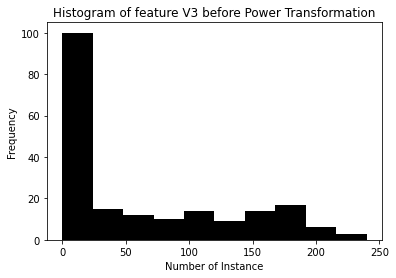

In [ ]:
plt.hist(df.V3, color='black')
plt.xlabel('Number of Instance')
plt.ylabel('Frequency')
plt.title('Histogram of feature V3 before Power Transformation')
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df.Class

# Data Preprocessing

## Power Transformation
**Yeo-Johnson**

In [ ]:
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

In [ ]:
X = pipeline.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
# allcolumns = df.iloc[:, :-1].columns

In [ ]:
X = DataFrame(X)

In [ ]:
X_yeo = X.copy()

In [ ]:
X_yeo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-0.957089,1.042815,-0.978070,-1.471780,-0.770770,1.302274,0.981853,1.619090,-1.019012,-0.883888,-0.831732,-0.314034,0.110363,-0.402370,-1.085984,-1.078540,-0.57629,-0.160128,-1.476072,-0.499270,-0.555277,-0.748919,1.392140,-1.003451,0.082634,-0.054104,-0.652678,0.476312,-0.727824,-1.156962,-0.753441,0.207731,-0.255712,-0.624978,-0.740517,-0.6853,-0.524562,-0.342189,-1.436683,-0.858972,...,-0.465308,1.132025,-0.123404,-1.330838,0.179146,-1.006872,1.884305,1.173101,2.996261,-0.824012,-0.862370,-0.550023,0.941216,-0.90625,-1.057450,-0.740583,-0.323708,-0.891911,-0.008038,-0.876573,0.946886,0.560025,-0.66461,-0.591747,-1.433225,0.494991,-1.282664,-1.646692,-0.343237,-0.830941,-0.215652,0.833941,0.968770,-0.854476,-0.315750,-1.230476,-1.074430,-0.252623,-1.043624,1.819305
1,-0.957089,0.394762,0.693930,-1.034465,1.573319,1.505789,0.838304,-0.623836,0.777461,-0.883888,-0.831732,-0.314034,-0.895479,2.579098,0.547323,-1.078540,-0.57629,-0.160128,-1.468430,1.272273,-0.555277,-0.748919,-0.787133,-1.003451,0.331770,-0.045642,-0.652678,0.921505,2.094445,-1.156962,-0.753441,0.612552,-0.956246,0.608706,-0.873225,-0.6853,-0.524562,-0.342189,-0.735152,-0.858972,...,-0.465308,0.893340,-0.123404,-0.557860,-0.941933,-0.082500,0.266415,1.603491,2.325761,1.546951,-0.862370,-0.550023,1.204261,-0.90625,-1.057450,-0.740583,-0.323708,-0.891911,1.359646,0.356309,1.098276,0.977300,-0.66461,-0.591747,-0.524533,0.646376,-1.282664,0.745925,3.026427,0.616687,-0.526689,1.115524,0.709284,-0.209840,1.751447,-1.230476,-1.328653,-0.252623,1.532443,0.535910
2,-0.957089,-1.199840,-0.947978,-1.813043,-0.770770,0.284445,0.970346,-0.623836,-1.019012,-0.883888,-0.831732,-0.314034,0.014163,-0.402370,-0.659311,-1.078540,-0.57629,-0.160128,-1.476072,-0.499270,-0.555277,-0.748919,0.821862,-1.003451,0.454471,0.081298,-0.652678,1.169169,0.778493,-1.156962,-0.753441,0.207731,-0.833313,-0.673172,-0.873225,-0.6853,-0.524562,-0.342189,-1.436683,-0.858972,...,-0.465308,1.342707,-0.123404,-1.330838,-0.868774,-0.841248,-1.011121,0.355099,-0.369676,-0.824012,-0.862370,-0.550023,1.188053,-0.90625,-1.057450,-0.740583,-0.323708,-0.891911,0.420217,-0.876573,1.223366,0.455261,-0.66461,-0.591747,-1.243607,0.660748,-1.282664,-0.876879,0.485869,-0.830941,-0.358776,1.016745,-0.181510,-0.854476,-0.544801,-1.230476,-0.966383,-0.252623,-0.293857,1.602213
3,-0.957089,0.753122,0.114627,-0.338580,0.560320,0.969605,1.363605,-0.623836,-1.019012,-0.883888,-0.831732,-0.314034,-0.895479,2.579361,-0.645403,-1.078540,-0.57629,-0.160128,-1.061156,-0.499270,-0.555277,-0.748919,1.464251,-1.003451,1.416392,-0.079489,-0.652678,0.304554,-0.146197,-1.156962,-0.753441,-0.271942,0.014667,-1.087808,0.564864,-0.6853,-0.524562,-0.342189,-0.621140,-0.858972,...,-0.465308,0.502704,-0.123404,-1.330838,-0.941933,-0.283868,1.236424,-0.237857,-0.369676,-0.824012,-0.862370,-0.550023,0.778859,-0.90625,-1.057450,-0.740583,-0.323708,-0.891911,0.154687,-0.876573,1.245835,0.349218,-0.66461,-0.591747,-1.433225,0.603214,-1.282664,-0.330553,3.016332,0.183461,-1.663441,1.074083,-1.086718,0.819738,0.423967,-1.230476,-0.838797,-0.252623,-1.043624,1.093809
4,1.465940,-1.199840,1.220480,0.131556,-0.770770,-1.292858,0.553178,-0.623836,-1.019012,-0.856746,-0.831732,-0.314034,0.366562,-0.402370,-0.082511,-0.511806,-0.57629,-0.160128,0.741369,-0.499270,-0.555277,-0.748919,-0.787133,-0.877738,1.782702,-1.187225,-0.652678,-0.307172,-0.241731,-0.112316,-0.753441,1.210403,-0.956246,0.330221,-0.873225,-0.6853,-0.524562,2.894227,-1.436683,-0.858972,...,-0.465308,-0.961357,-0.123404,-0.289873,1.275578,-1.006872,-1.011121,1.504773,-0.369676,-0.824012,-0.307257,-0.550023,0.059506,-0.90625,-0.009582,1.816854,-0.323708,-0.891911,-0.655371,

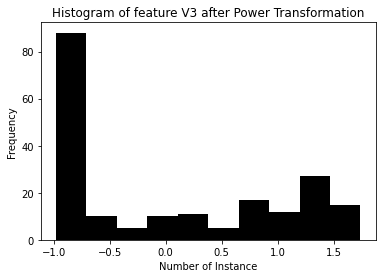

In [ ]:
plt.hist(X_yeo[2], color='black')
plt.xlabel('Number of Instance')
plt.ylabel('Frequency')
plt.title('Histogram of feature V3 after Power Transformation')
plt.show()

## Feature Selection
**RFE**

In [ ]:
Xrfe = X_yeo.copy()

In [ ]:
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1000, step=1)
rfe.fit(Xrfe, y)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=1000)

In [ ]:
ranking = rfe.ranking_

In [ ]:
df_rfe = pd.DataFrame([ranking, X_yeo.columns]).T
df_rfe.head()

,0,1
0,4869,0
1,7801,1
2,6743,2
3,8948,3
4,1,4


In [ ]:
df_rfe.shape

(10000, 2)

In [119]:
X_rfe = df_rfe.sort_values(0, ascending=True).reset_index(drop=True).iloc[:1000]

In [120]:
X_rfe.head()

,0,1
0,1,7533
1,1,4163
2,1,6539
3,1,871
4,1,4168


In [121]:
X_rfe_df = X_yeo.iloc[:, X_rfe[1]]
X_rfe_df.head(2)

,7533,4163,6539,871,4168,4176,9634,6883,4182,4184,9641,2532,8229,6889,4193,861,4195,880,4152,2570,4121,2555,899,897,9318,8244,4137,4143,9315,889,888,9627,9313,8248,7385,2531,2528,9658,8192,2507,...,7894,583,1775,4737,409,5143,528,7927,7445,4817,2290,6958,532,9747,5144,2293,413,1716,7985,403,395,6957,2295,2357,4843,9050,1776,7932,6010,7171,2355,4828,4821,7815,1761,2358,7976,5131,4855,422
0,-0.644839,0.785738,-0.252643,-0.758349,0.543668,-1.003113,0.889573,-0.794276,-0.767332,-0.731742,0.574793,2.449337,-0.378983,-0.689769,-0.650481,-0.542090,-0.370103,-0.299440,-0.467291,-0.929074,1.900586,0.057735,-0.4022,0.749498,-0.356740,-0.850378,2.432610,1.896518,-1.050903,-1.338741,1.402597,0.826150,-0.587017,-0.715030,-0.806824,-0.44671,-0.695765,-0.748579,-0.323224,-0.782456,...,-0.897581,-0.019791,-0.175863,-0.647782,-0.943229,1.452920,-0.641112,-0.684306,0.28690,-1.070409,-0.392169,0.417387,-0.737283,-0.322761,-0.844507,0.346709,-1.227911,0.893331,0.362821,1.011326,-0.922498,-0.793903,-0.142857,-0.908820,-0.100504,-0.623189,-0.395977,-0.591291,1.375745,-0.263664,1.059075,0.820036,-0.482767,-0.48367,-0.850608,0.099023,-0.724601,-0.731629,1.299013,0.515607
1,-0.644839,0.645126,-0.252643,1.428468,0.705342,-0.114572,0.683220,-0.794276,1.549196,1.781160,0.429710,2.418730,1.044994,-0.689769,0.167521,1.778914,-0.370103,-0.126279,2.330196,-0.308474,-0.924867,0.246468,-0.4022,0.626591,1.746088,0.672179,-1.718835,-0.615272,0.823557,0.292662,1.294818,-1.072916,1.162604,1.802695,-0.898934,-0.44671,-0.695765,1.168434,-0.323224,-0.782456,...,-0.897581,-0.117169,-0.175863,1.925135,-0.943229,-0.743129,-0.641112,1.473039,-0.25635,1.601074,-0.392169,1.247231,1.422935,-0.322761,-0.844507,0.313090,0.251249,-1.331948,0.191031,0.809110,0.427202,1.563896,-0.142857,-1.168987,-0.100504,-0.623189,-0.395977,-0.591291,-0.711617,-0.263664,0.351828,-1.476528,-0.482767,-0.48367,1.291393,-1.115650,0.655512,-0.731629,1.299013,0.529809


In [123]:
X_rfe_df.shape

(200, 1000)

## Train test split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe_df, y, test_size=0.2, random_state=10)

# Model Train
**K-Nearest Neighbours**

In [125]:
acc = np.empty(20)
train_acc = np.empty(20)

for i in range(1, 20):
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc[i] = accuracy_score(y_test, y_pred)
    y_pred_t = m.predict(X_train)
    train_acc[i] = accuracy_score(y_train, y_pred_t)
    print('=========== K:', i)
    print('Train: ', train_acc[i])
    print('Test:', acc[i])

=========== K: 1
Train:  1.0
Test: 0.95
=========== K: 2
Train:  0.95
Test: 0.925
=========== K: 3
Train:  0.9875
Test: 0.95
=========== K: 4
Train:  0.95625
Test: 0.95
=========== K: 5
Train:  0.975
Test: 1.0
=========== K: 6
Train:  0.9625
Test: 0.975
=========== K: 7
Train:  0.9625
Test: 0.975
=========== K: 8
Train:  0.95
Test: 0.975
=========== K: 9
Train:  0.975
Test: 0.975
=========== K: 10
Train:  0.94375
Test: 0.95
=========== K: 11
Train:  0.95625
Test: 0.95
=========== K: 12
Train:  0.925
Test: 0.925
=========== K: 13
Train:  0.925
Test: 0.925
=========== K: 14
Train:  0.90625
Test: 0.9
=========== K: 15
Train:  0.91875
Test: 0.925
=========== K: 16
Train:  0.9
Test: 0.925
=========== K: 17
Train:  0.90625
Test: 0.925
=========== K: 18
Train:  0.86875
Test: 0.9
=========== K: 19
Train:  0.89375
Test: 0.9


In [126]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

print('train accuracy:', accuracy_score(y_predict_train, y_train))
print('test accuracy:', accuracy_score(y_predict, y_test))

train accuracy: 0.9875
test accuracy: 0.95


In [127]:
# lets first create k folds of our dataset
kfold = KFold(n_splits=10, random_state=10, shuffle=True)

# now lets train and varify each model's cross validations score
cv_report = cross_val_score(model, X_train, y=y_train, cv=kfold, scoring='accuracy')

print(cv_report)
print(cv_report.mean())

[0.9375 0.9375 0.9375 1.     0.9375 0.9375 1.     0.9375 0.9375 1.    ]
0.95625


In [128]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Class,,
0,12,0
1,2,26


## Confusion Matrix plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


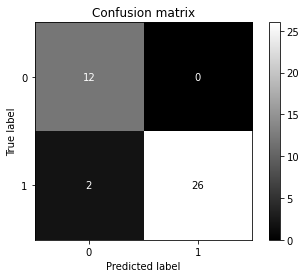

In [129]:
plot_confusion_matrix(model, X_test, y_test, cmap='gray')
plt.title('Confusion matrix')
plt.show()

In [130]:
proba1 = model.predict_proba(X_test)[:, 1:]
proba2 = [0 for _ in range(len(y_test))]
fpr1, tpr1, threshold1 = roc_curve(y_test, proba1)
fpr2, tpr2, threshold2 = roc_curve(y_test, proba2)

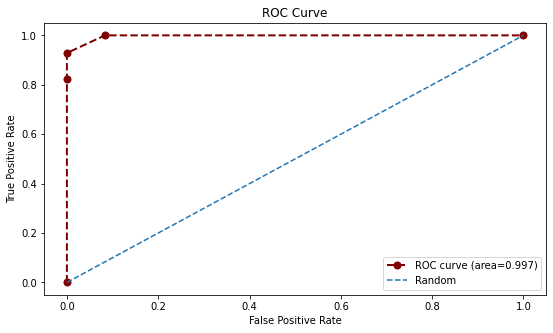

In [135]:
plt.figure(figsize=(9, 5))
plt.plot(fpr1, tpr1, color='maroon', marker='o', linestyle='dashed', linewidth=2, markersize=7, label='ROC curve (area=0.997)')
plt.plot(fpr2, tpr2, linestyle='--', label='Random', )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Classification Report

In [132]:
print(classification_report(y_test, y_predict))
print('train accuracy:', accuracy_score(y_train, y_predict_train))
print('test accuracy:', accuracy_score(y_test, y_predict))
print('auc score:', roc_auc_score(y_test, proba1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.93      0.96        28

    accuracy                           0.95        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.96      0.95      0.95        40

train accuracy: 0.9875
test accuracy: 0.95
auc score: 0.9970238095238095


## Learning Curve

In [133]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="maroon")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="maroon",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="blue",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

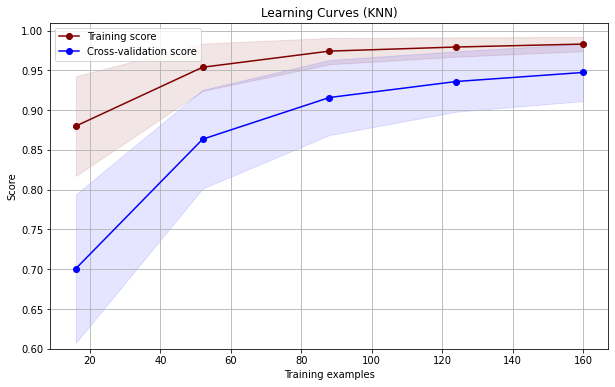

In [134]:
title = "Learning Curves (KNN)"
cv = ShuffleSplit(X_rfe_df.shape[0], test_size=0.2, random_state=0)
plot_learning_curve(model, title, X_rfe_df, y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)

plt.show()

**As the sample increases, so does the validation score.**